<div style="text-align:center; font-weight:bold; font-size:28px;">Лабораторна робота №4</div>

**<span style="font-size:1.5em;">Мета:</span>** *<span style="font-size:1.2em;">Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінки їх складності.</span>*

<img src="Images4/It's_me.png" width="300" height="200" style="float: left; margin-right: 10px;">

<div style="font-size:20px;">Виконав: Маркович Денис
група КІ-22-1</div>

**<div style="font-size:16px;">Реалізація лінійного пошуку на Python</div>**

In [2]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

In [3]:
search_item = int(input("Введіть шуканий елемент: "))

Введіть шуканий елемент: 13


In [4]:
a = [32, 1, 3, 4, 13, 2, 1]
linear_search(a, search_item)

4

**<div style="font-size:16px;">Оцінка асимптотичної складністі алгоритму лінійного пошуку у  О -нотації.</div>**
<div style="font-size:16px;">
    Алгоритм лінійного пошуку, який перевіряє кожен елемент у списку, має часову складність O(n), де "n" - кількість елементів у вхідному списку. Це означає, що час виконання зростає лінійно з розміром вхідних даних. У найгіршому випадку, коли елемент знаходиться в кінці списку або відсутній, алгоритм пройде через всі елементи.
</div>

**<div style="font-size:16px;">Оцінка асимптотичної складністі алгоритму бінарного пошуку пошуку у  О -нотації.</div>**
<div style="font-size:16px;">
    Асимптотична складність бінарного пошуку в O-нотації становить O(log n), де n - розмір вхідного відсортованого масиву чи списку. Це означає, що час виконання алгоритму зростає логарифмічно з розміром вхідних даних, роблячи його ефективним для швидкого пошуку у великих наборах даних.
</div>

<div style="font-size:16px;">
    <span style="font-weight:bold;">Умова:</span> написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де n -- розмір масиву для функції linear_search();
</div>

In [5]:
import pandas as pd
import time

def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

def measure_linear_search_time(n):
    a_list = list(range(n))
    start_time = time.time()
    linear_search(a_list, n + 1)
    end_time = time.time()
    return end_time - start_time

def generate_dataframe(max_n):
    data = {"n": [], "time": []}
    for n in range(1, max_n + 1):
        execution_time = measure_linear_search_time(n)
        data["n"].append(n)
        data["time"].append(execution_time)

    df = pd.DataFrame(data)
    return df

max_n_value = 1000
result_dataframe = generate_dataframe(max_n_value)
print(result_dataframe)

        n          time
0       1  9.536743e-07
1       2  9.536743e-07
2       3  0.000000e+00
3       4  0.000000e+00
4       5  9.536743e-07
..    ...           ...
995   996  2.574921e-05
996   997  2.121925e-05
997   998  2.098083e-05
998   999  2.098083e-05
999  1000  2.884865e-05

[1000 rows x 2 columns]


<div style="font-size:16px;">
    <span style="font-weight:bold;">Умова:</span> написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де n -- розмір масиву для функції `bin_searh();
</div>

In [6]:
import pandas as pd
import time

def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif a_list[middle] < x:
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

def measure_bin_search_time(n):
    a_list = list(range(n))
    x = n // 2
    start_time = time.time()
    result = bin_search(a_list, x, 0, len(a_list) - 1)
    end_time = time.time()
    execution_time = end_time - start_time
    return {"n": n, "time": execution_time}

sizes = [10, 100, 1000, 10000]
results = [measure_bin_search_time(size) for size in sizes]

df = pd.DataFrame(results)

print(df)

       n      time
0     10  0.000004
1    100  0.000006
2   1000  0.000005
3  10000  0.000008


<div style="font-size:16px;">
    <span style="font-weight:bold;">Умова:</span> за результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.
</div>

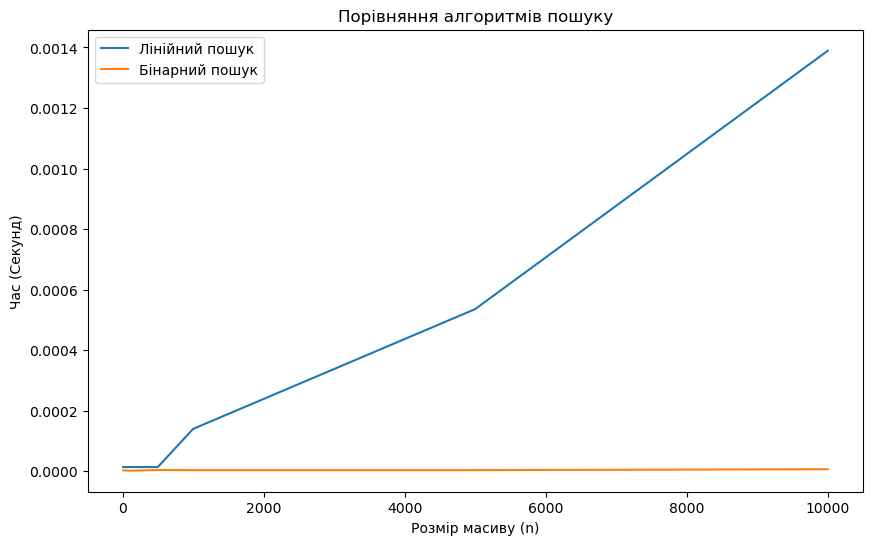

In [4]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

def measure_time(search_func, arr, target):
    start_time = time.time()
    search_func(arr, target)
    end_time = time.time()
    return end_time - start_time

def generate_data(n_values, search_func):
    data = {"n": [], "time": []}
    for n in n_values:
        arr = np.arange(n)
        target = np.random.randint(0, n)
        elapsed_time = measure_time(search_func, arr, target)
        data["n"].append(n)
        data["time"].append(elapsed_time)
    return pd.DataFrame(data)

n_values = [10, 100, 500, 1000, 5000, 10000]

linear_search_data = generate_data(n_values, linear_search)

binary_search_data = generate_data(n_values, binary_search)

plt.figure(figsize=(10, 6))
plt.plot(linear_search_data["n"], linear_search_data["time"], label='Лінійний пошук')
plt.plot(binary_search_data["n"], binary_search_data["time"], label='Бінарний пошук')
plt.title('Порівняння алгоритмів пошуку')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час (Секунд)')
plt.legend()
plt.show()


<div style="font-size:16px;">
    <span style="font-weight:bold;">Умова:</span> оцінити, який з двох алгоритмів є більш ефективним та в якому діапазоні розміру задачі. <br/><br/>
Основна ідея бінарного пошуку полягає в тому, що на кожному кроці алгоритм зменшує свій діапазон пошуку вдвічі.<br/> На графіку видно, як змінюється час виконання зі збільшенням розміру масиву. <br/>
    Зазвичай бінарний пошук буде ефективнішим, особливо при великих розмірах масивів, оскільки його асимптотична складність буде набагато кращою, ніж для лінійного пошуку. 
</div>

<div style="font-weight:bold; font-size:18px;">Відповідь на Контрольні запитання</div>

<div style="font-size:16px;">
    1. Символ Ω використовується для вказівки "не менше, ніж" або "осідає нижню межу".<br/>
    Якщо складність алгоритму обчислень асимптотично не менше g(n), то цю складність можна виразити за допомогою символу Ω(g(n)). <br/>
    Цей символ дозволяє нам оцінювати "найгірший" випадок виконання алгоритму.
</div>

<div style="font-size:16px;">
    2. Функція часової складності має вигляд: F(N)=N^3+7N^2-14N.<br/>
    Щоб знайти асимптотичну складність, вибираємо члени, які мають найвищий порядок зростання. В нашому випадку N^3.<br/>
    Функція F(N) має асимптотичну складність, обмежену зверху функцією N^3 при N, що прямує до нескінченності.
</div>

<div style="font-size:16px;">
    3. Функція часової складності має вигляд: F(N)=1.01^N+N^10.<br/>
    Оскільки 1.01^N зростає експоненційно та швидше, ніж N^10, то експоненційний член домінуючий при великих значеннях N.<br/>
    Отже, асимптотична складність функції буде в нотації O(1.01^N).
</div>

<div style="font-size:16px;">
    4. Функція часової складності має вигляд: F(N)=N^1.3+10log2N.<br/>
    Оскільки N^1.3 зростає швидше, ніж log2N, то поліноміальний член буде домінуючим при великих значеннях N.<br/>
    Отже, асимптотична складність функції буде в нотації O(N^1.3).
</div>

<div style="font-size:16px;">
    5. Ідея розпаралелювання полягає в тому, щоб розбити обчислення завдання на менші частини і виконувати їх одночасно за допомогою різних обчислюбвальних ресурсів.<br/>
    Мета полягає в прискоренні виконання завдань та опимізації використання ресурсів. <br/>
    Розпаралелювання можа використовувати до всього у нашому випадку, але це навпаки сповільнить роботу і робота буде вже не така ефективна.
</div>

<div style="font-size:16px;">
    6. Підвищення обчислювальної швидкості алгоритмів може бути досягнуте за допомогою подібних методів:<br/>
    - оптимізація коду;<br/>
    - паралельність;<br/>
    - кешування;<br/>
    - алгоритмічні підходи;<br/>
    - оптимізація обчислень;<br/>
    - апаратне забезпечення;<br/>
    Найбільш ефективний метод залежить від посталеної задачі, характеристик системи та ресурсів. Також методи можна поєднувати для покращення результату.
</div>